In [2]:
# Imports for panel visualizations
import panel as pn
import plotly.express as px
pn.extension('plotly')
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import seaborn as sns
from pathlib import Path
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the file path
file_path = Path('../Data/hotel_bookings.csv')

# Read the file and store it in hotel_data
hotel_data = pd.read_csv(file_path)

# Display the loaded hotel_data
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Country of Origin Information

In [4]:
# Copy over the country and arrival_date_year columns data to prepare new dataframe
origin_country = hotel_data[["country", "arrival_date_year"]].copy()
# Show what has been copied
origin_country.head()

,country,arrival_date_year
0,PRT,2015
1,PRT,2015
2,GBR,2015
3,GBR,2015
4,GBR,2015


In [5]:
# Define a function to return the pie charts for the top 15 countries of origin for guests reservations
def pie_chart(year):
    # Slice data by arrival_date_year
    origin_country_year = origin_country.loc[origin_country["arrival_date_year"] == year]
    
    # Create a dataframe with the origin country and corresponding value count for each year
    origin_country_year = origin_country_year["country"].value_counts().to_frame()
    
    # Rename the country column to num_of_guests_reservations for each year
    origin_country_year.rename(columns={"country":"num_of_guests_reservations"}, inplace=True)
    
    # Calculate the total number of guests reservations for each year
    total_guests_reservations_year = origin_country_year["num_of_guests_reservations"].sum()
    
    # Add a column for the percentage of guests from each country for each year
    # Calculate the percentage of guests from each country and round to two decimals
    origin_country_year["percentage_of_guests_reservations"] = round(origin_country_year["num_of_guests_reservations"] / total_guests_reservations_year * 100, 2)
    
    # Sort dataframes by percentage_of_guests, largest to smallest
    origin_country_year.sort_values(by="percentage_of_guests_reservations", ascending=False, inplace=True)
    
    # Get the top 15 countries for each year to show on the pie chart
    top_15_year = origin_country_year[:15]
    
    # Set up parameters to plot with plotly.express
    fig_pie_px_year = px.pie(top_15_year, 
                            values = "percentage_of_guests_reservations", 
                            names = top_15_year.index, 
                            title = ("Top 15 Countries"),
                            hover_data={"percentage_of_guests_reservations":False},
                            width=325,
                            height=550)
    fig_pie_chart = fig_pie_px_year
    return fig_pie_chart


## Data Cleanup for Mapping Country of Origin Information

In [6]:
# Load the data that contains the longitude and latitude coordinates
# Set the file path
file_path = Path("Resources/worldcities.csv")

# Read in the csv
world_data = pd.read_csv(file_path)

# Display the data
world_data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [7]:
# Define a function to return the mapped coordinates plot
def map_data():
    # Copy over the country column data to prepare new dataframe
    origin_country_map = hotel_data["country"].copy()
    
    # Create origin_country_df dataframe to prepare data relevant to mapping
    # Convert the origin country and corresponding value count into a dataframe
    origin_country_map_df = origin_country_map.value_counts().to_frame()
    
    # Rename the country column to num_of_guests_reservations
    origin_country_map_df.rename(columns={"country":"num_of_guests_reservations"}, inplace=True)
    
    # Drop the irrelevant columns for mapping ["city_ascii", "iso2", "admin_name", "capital", "id", "population", "country"]
    world_map_data = world_data.drop(columns=["city_ascii", "iso2", "admin_name", "capital", "id", "population", "country"])
    
    # Create a list of the countries that are needed to plot
    country_list = origin_country_map_df.index.tolist()
    
    # Update the dataframe to remove the countries that are not needed
    map_data_df = world_data[world_data["iso3"].isin(country_list) == True]
    
    # Drop the duplicate countries using the "iso3" column as the subset criteria
    # Keep the first instance of data, for simplicity plot one city for each country, no city data available in dataset
    map_data_df.drop_duplicates(subset="iso3", keep="first", inplace=True)
    
    # Set up parameters to plot the points on a map
    fig_map = map_data_df.hvplot.points("lng", "lat", geo=True, color="yellow", alpha=0.5, 
                                        tiles="ESRI", size=200, title="World Map of Guests", frame_width=1000)
    
    return fig_map

# Hotel Type Data

## Percent of Reservations by Hotel and Year

In [8]:
# Copy over the hotel type and arrival_date_year columns data to prepare new dataframe
hotel_type = hotel_data[["hotel", "arrival_date_year"]].copy()

# Show what has been copied
hotel_type.head()

,hotel,arrival_date_year
0,Resort Hotel,2015
1,Resort Hotel,2015
2,Resort Hotel,2015
3,Resort Hotel,2015
4,Resort Hotel,2015


In [9]:
# Define a function to return hotel type data
def hotel_type_data(hotel):
    # Slice the data according to the hotel_type
    type_chosen = hotel_type.loc[(hotel_type["hotel"] == hotel)]
    
    # Create a dataframe that includes the value_counts for the arrival_date_year
    type_chosen_df = type_chosen["arrival_date_year"].value_counts().to_frame()
    
    # Sort the index which is now the arrival_date_year by chronological order (2015-2017)
    type_chosen_df = type_chosen_df.sort_index()
    
    # Rename the arrival_date_year column to total_guest
    type_chosen_df = type_chosen_df.rename(columns={"arrival_date_year":"total_guests"})
    
    return type_chosen_df

In [10]:
# Define a function to concatenate hotel data to one dataframe and return a bar chart for the data
def combined_data():
    # Use the hotel_type_data function to pull in the Resort Hotel data
    hotel_1_df = hotel_type_data("Resort Hotel")
    
    # Rename the total_guests column to res_total_guest_reservations
    hotel_1_df = hotel_1_df.rename(columns={"total_guests":"res_total_guest_reservations"})
    
    # Use the hotel_type_data function to pull in the City Hotel data
    hotel_2_df = hotel_type_data("City Hotel")
    
    # Rename the total_guests column to city_total_guest_reservations
    hotel_2_df = hotel_2_df.rename(columns={"total_guests":"city_total_guest_reservations"})
    
    # Concatenate the two dataframes
    combined_df = pd.concat([hotel_1_df, hotel_2_df], axis=1)
    
    # Calculate the total_guest_reservations and add another column for it
    combined_df["total_guest_reservations"] = combined_df["res_total_guest_reservations"] + combined_df["city_total_guest_reservations"]
    
    # Calculate the percentage of Resort Hotel reservations 
    combined_df["res_percent"] = round((combined_df["res_total_guest_reservations"] / combined_df["total_guest_reservations"]) * 100, 2)
    
    # Calculate the percentage of City Hotel reservations
    combined_df["city_percent"] = round((combined_df["city_total_guest_reservations"] / combined_df["total_guest_reservations"]) * 100, 2)
    
    # Set up the parameters to plot the data
    # Assign the data to plot to the following variables
    labels = combined_df.index
    city_percent = combined_df.city_percent
    res_percent = combined_df.res_percent
    
    # Setup the x-axis and the width of each bar
    x = np.arange(len(labels))
    width = 0.35
    
    # Setup the subplots with the x and width variables assigned
    fig, ax = plt.subplots(figsize=(8,6))
    rects1 = ax.bar(x - width/2, city_percent, width, label="City Hotel", color=["cyan"])
    rects2 = ax.bar(x + width/2, res_percent, width, label="Resort Hotel", color=["orange"])
    
    # Set up the rest of the labels, title, etc.
    ax.set_ylabel("Reservations [%]", fontsize=16)
    ax.set_title("Guest Reservations per year", fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=16)
    ax.legend()
   
    # Use pn.pane.Matplotlib to set it up to render in the Panel dashboard
    fig_pane = pn.pane.Matplotlib(fig)
    
    return fig_pane

## Cancellation Data

In [11]:
def cancellation_data():
    res_book_per_month = hotel_data.loc[(hotel_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
    res_cancel_per_month = hotel_data.loc[(hotel_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

    cty_book_per_month = hotel_data.loc[(hotel_data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
    cty_cancel_per_month = hotel_data.loc[(hotel_data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

    res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
    cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

    full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
    full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

    # order by month:
    ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
    full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

    # show figure:
    fig = plt.figure(figsize=(8,6))
    sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
    plt.title("Cancellations per month", fontsize=16)
    plt.xlabel("Month", fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel("Cancellations [%]", fontsize=16)
    plt.legend(loc="upper right")
    
    fig_pane = pn.pane.Matplotlib(fig)
    
    return fig_pane

# Correlation Heatmap

In [12]:
# Define a function to output the correlation heatmap
def corr_heatmap():
    # For the following, features, we will fill null data with a unique value
    hotel_data["country"] = hotel_data["country"].fillna('Unknown')
    hotel_data["agent"] = hotel_data["agent"].fillna(0)
    hotel_data["children"] = hotel_data["children"].fillna(0)

    # For the "company" feature, given it is essentially irrelevant (almost entirely null), we will remove the column
    hotel_data.drop(columns=['company'], inplace=True)

    # Identify and plot correlation via heatmap, we may remove any features we believe are highly coorelated
    correlation = hotel_data.corr()
    plt.figure(figsize = (20,10))
    hotel_corr = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="GnBu").get_figure()
    return hotel_corr

# Panel Dashboard

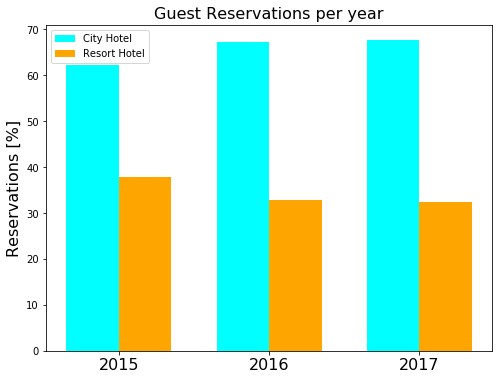

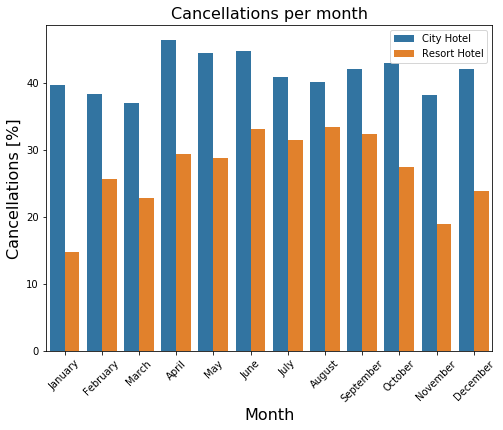

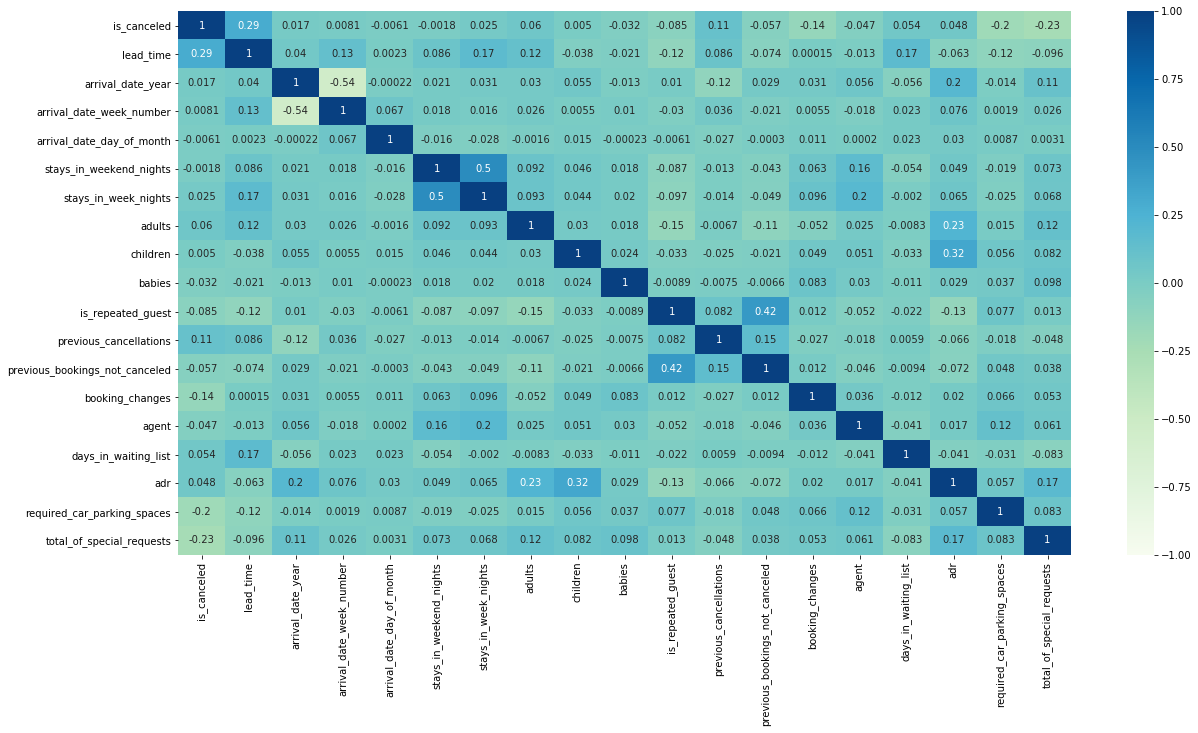

In [13]:
# Use the functions created to display visuals with panel

# Setup a subtitle to go with the country of origin data
tab_subtitle = "## Percentage of Total Guest Reservations by Year and Country"

# Use the pie_chart function to generate pie_charts for each year and setup as Row format
yearly_data = pn.Row("## 2015", pie_chart(2015), 
                     "## 2016", pie_chart(2016), 
                     "## 2017", pie_chart(2017))

# Use the map_data function, tab_subtitle, and yearly_data to setup the country of origin info as Column format
country_data = pn.Column(map_data(), tab_subtitle, yearly_data)

# Use the combined_data function to setup hotel type data as Row format 
hotel_type_percent_data = pn.Row(combined_data(), cancellation_data())

# Use the corr_heatmap function to setup correlation map as a Row format
correlation_heatmap = pn.Row(corr_heatmap())

# Grab saved accuracy score figures
# Ideally this would be structured to be more integrated with the analysis notebook
png_pane_acc_score_grid = pn.pane.PNG("../Images/accuracy_score_grid.png", width=600)
png_pane_acc_score_viz = pn.pane.PNG("../Images/accuracy_score_viz.png", width=600)

acc_scores = pn.Row(png_pane_acc_score_grid, png_pane_acc_score_viz)

# Setup the Panel tabs to display on the dashboard
panel = pn.Tabs(
    ("Country of Origin", country_data),
    ("Hotel Type Data", hotel_type_percent_data),
    ("Correlation", correlation_heatmap),
    ("Accuracy Scores", acc_scores),
)

Tabs
    [0] Column
        [0] HoloViews(Overlay)
        [1] Markdown(str)
        [2] Row
            [0] Markdown(str)
            [1] Plotly(Figure)
            [2] Markdown(str)
            [3] Plotly(Figure)
            [4] Markdown(str)
            [5] Plotly(Figure)
    [1] Row
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
    [2] Row
        [0] Matplotlib(Figure)
    [3] Row
        [0] PNG(str, width=600)
        [1] PNG(str, width=600)
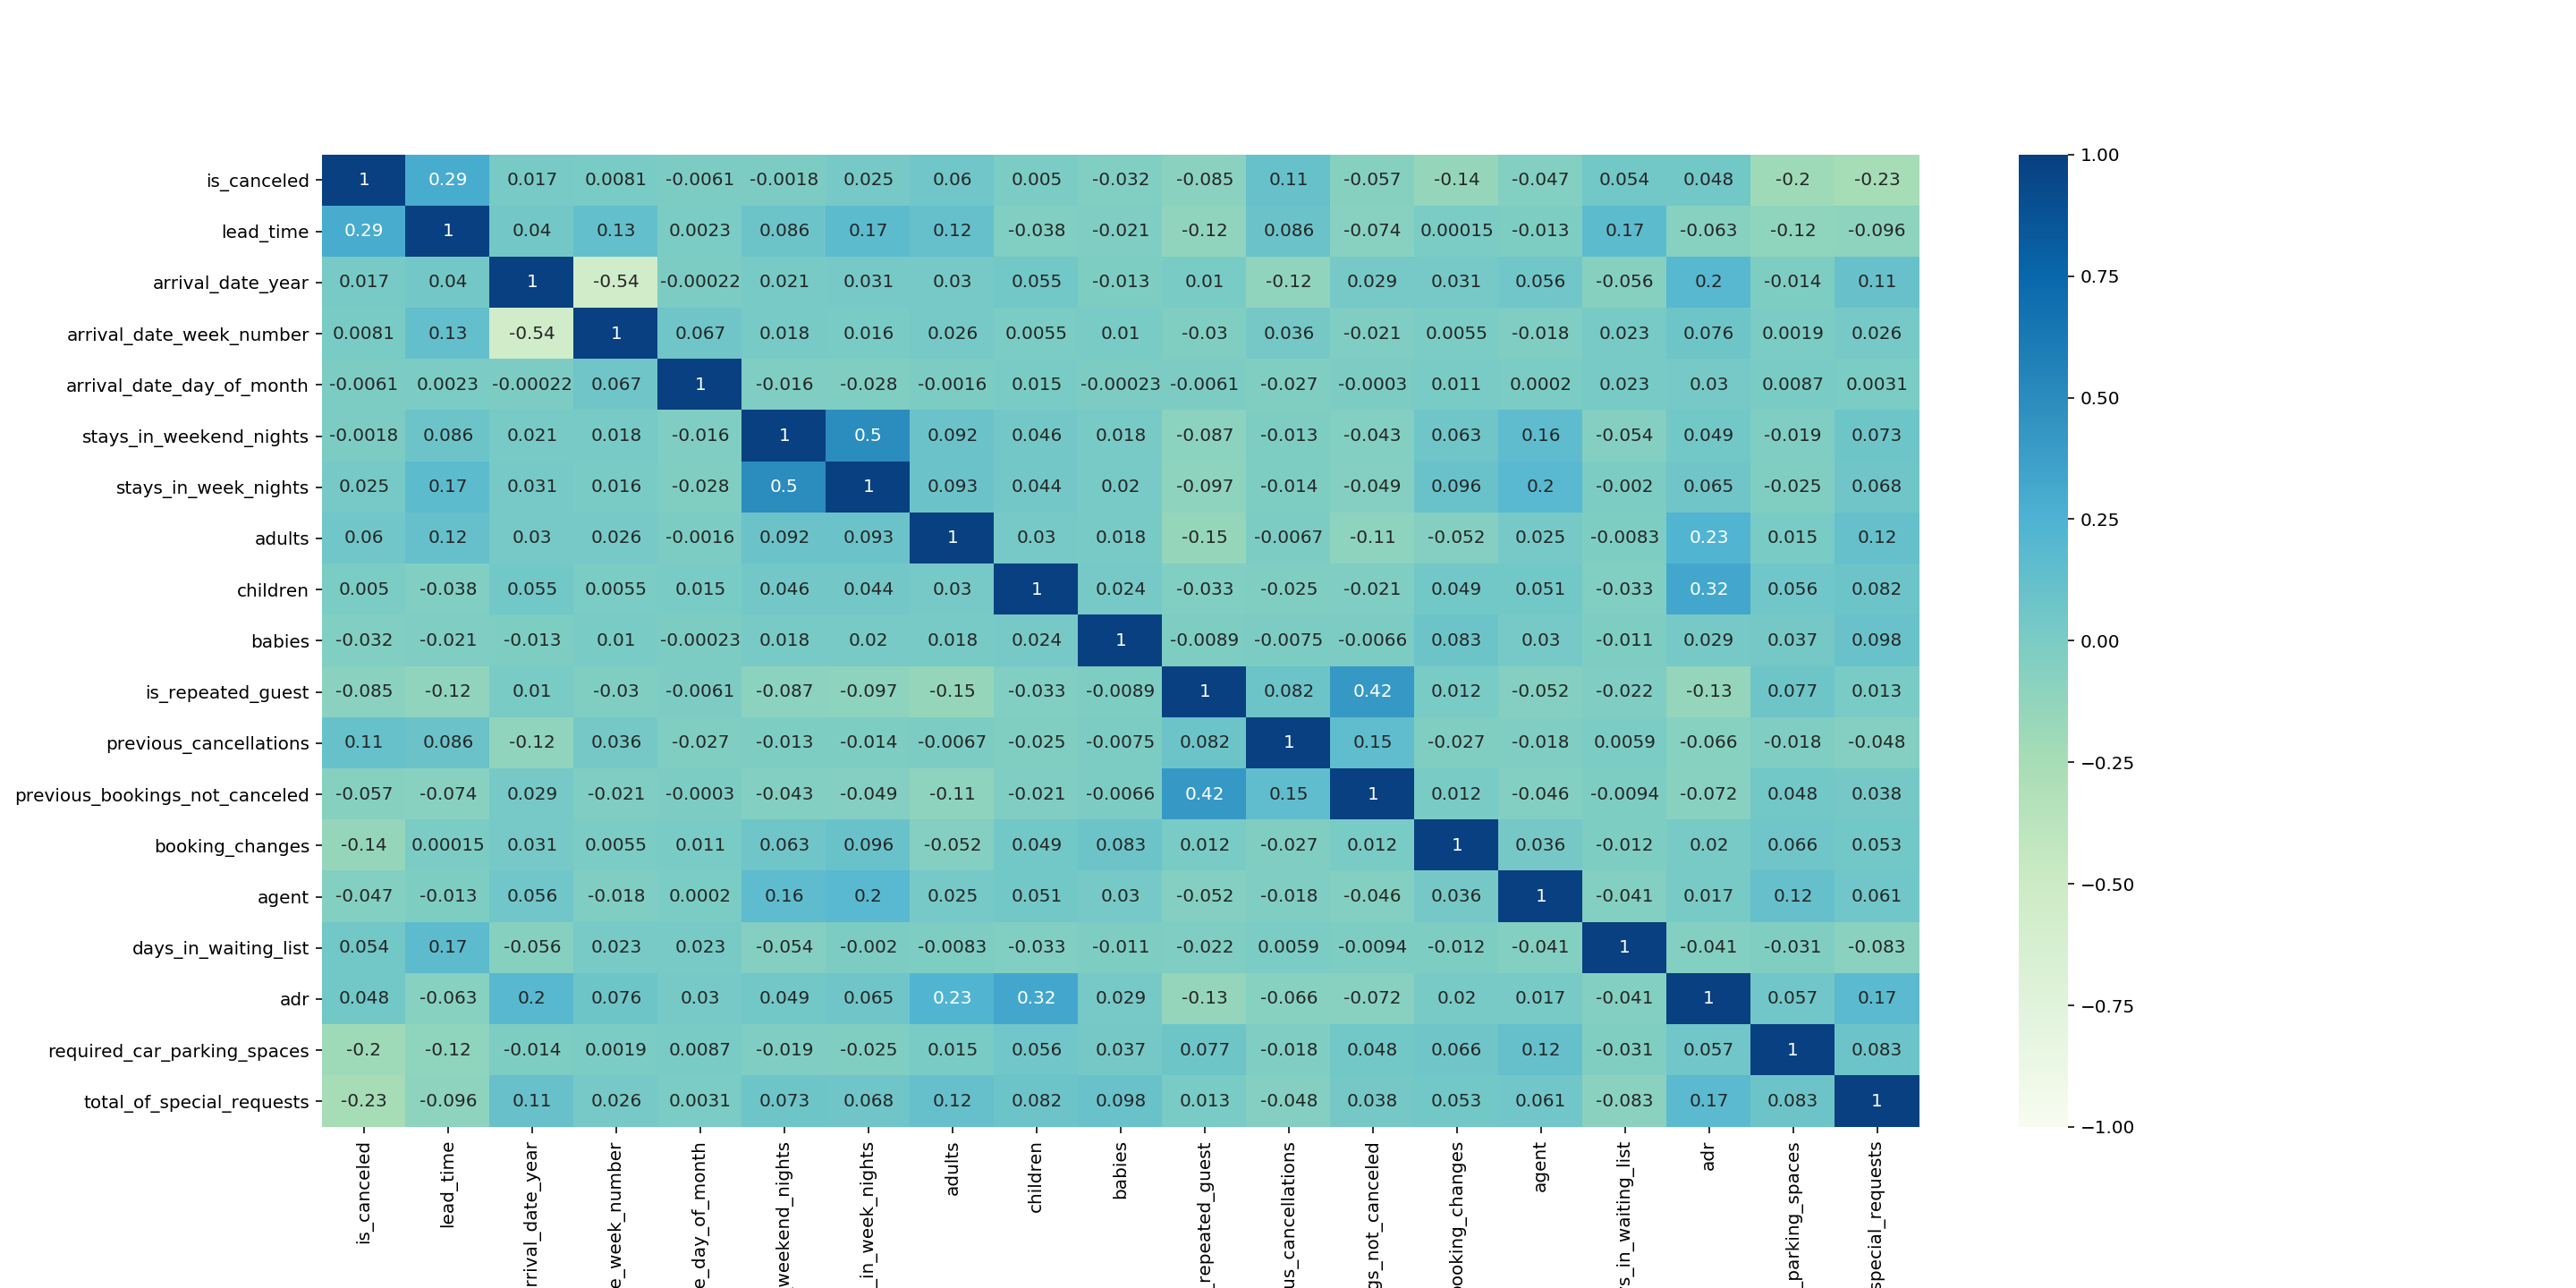
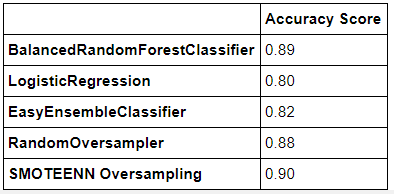
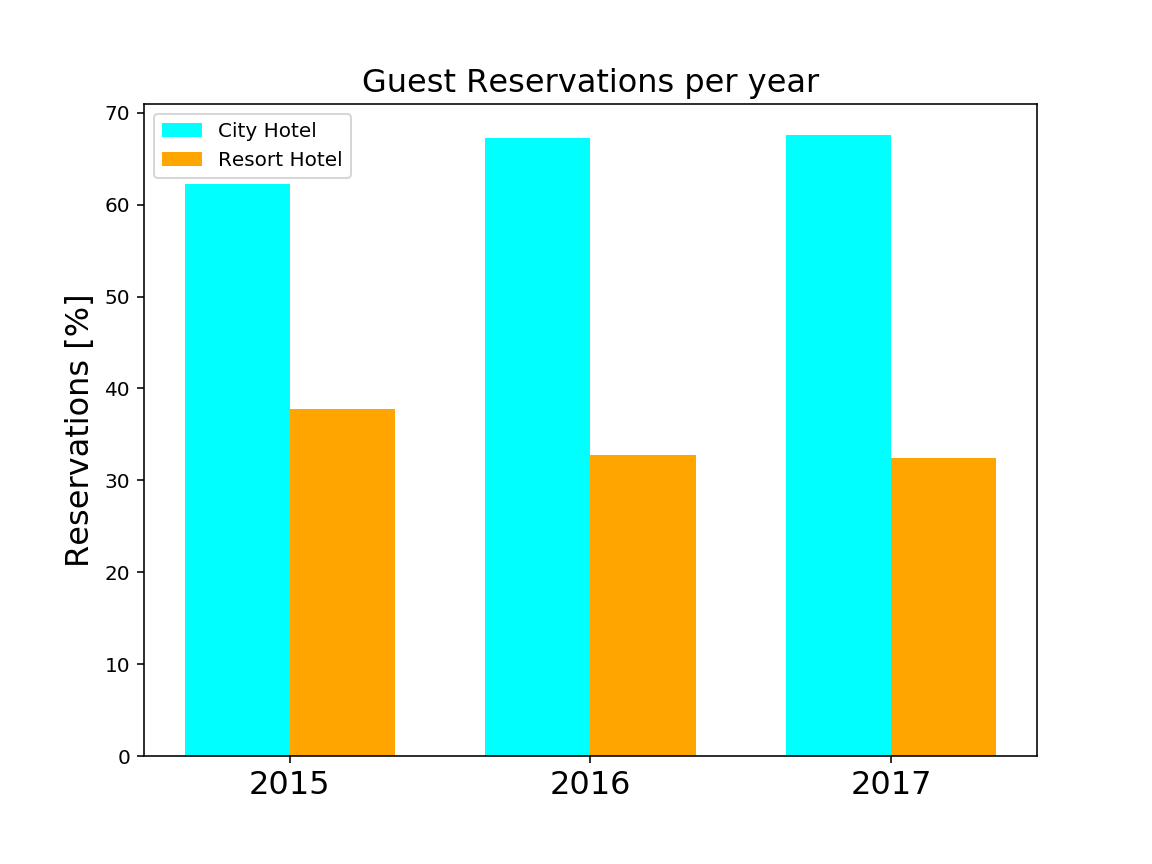
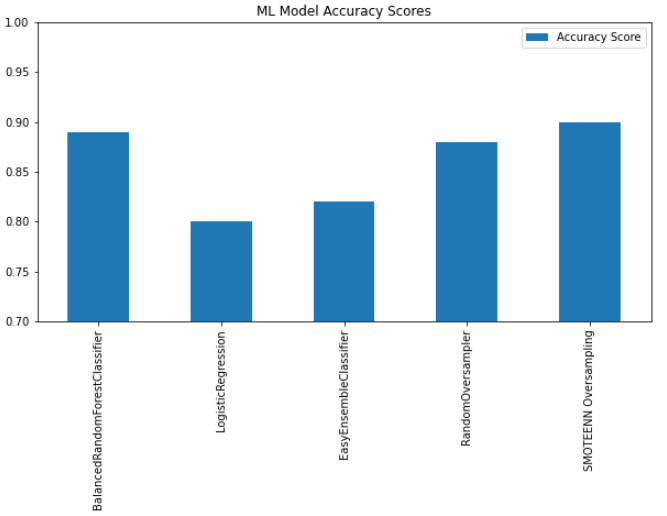
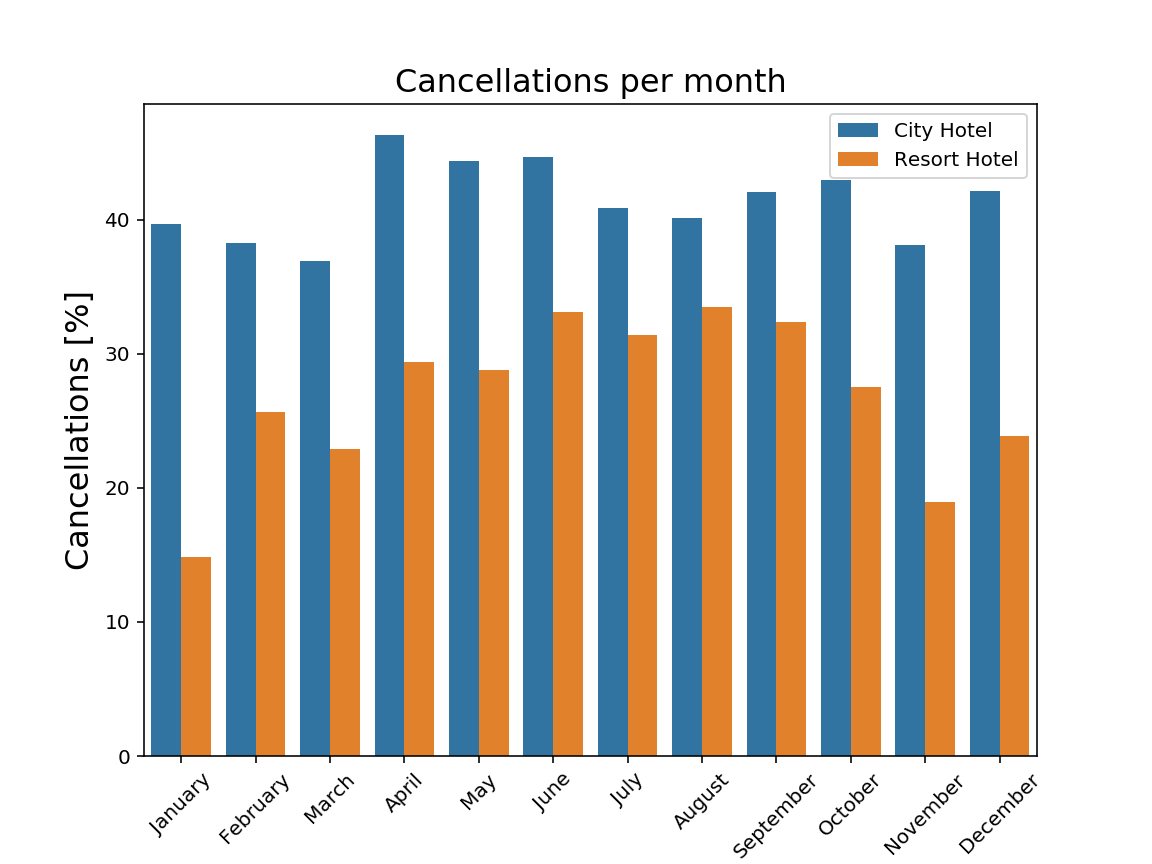

In [14]:
# Serve the Panel dashboard

panel.servable()